In [23]:
import pandas as pd, xarray as xr, numpy as np, matplotlib.pyplot as plt, sklearn as sk, scipy

In [24]:
#Load in feature and label data
features = pd.read_csv('C:/users/benja/downloads/ORIE4741/all_feature_data.csv')
labels = pd.read_csv('C:/users/benja/downloads/ORIE4741/all_label_data.csv')
features = features.drop(columns = ['Unnamed: 0'])
labels = labels.drop(columns = ['Unnamed: 0'])

In [25]:
#Remove data points with more than half of features missing
dropidxs = []
for i in range(features.shape[0]):
  if pd.isnull(features).sum(axis = 1)[i] > 0.5*features.shape[1]:
    dropidxs.append(i)
print('Dropping ' + str(len(dropidxs)) + ' data points due to missing data')

features = features.drop(index = dropidxs).reset_index(drop=True)
labels = labels.drop(index = dropidxs).reset_index(drop=True)

Dropping 75 data points due to missing data


Train/Test/Validate Split

In [26]:
from numpy import random
#Set random seed for reproducible results
np.random.seed(1)

In [27]:
#Randomly select indices for training and testing data

other_indices = []
test_indices = []
validate_indices = []
train_indices = []

while len(train_indices) < int(np.round(features.shape[0] * 0.6)):
  i = np.random.randint(0, features.shape[0])
  if i not in train_indices:
    train_indices.append(i)

for i in range(features.shape[0]):
  if i not in train_indices:
    other_indices.append(i)

while len(validate_indices) < int(np.round(len(other_indices) * 0.5)):
  i = np.random.randint(0, len(other_indices))
  if other_indices[i] not in validate_indices:
    validate_indices.append(other_indices[i])

for i in range(len(other_indices)):
  if other_indices[i] not in validate_indices:
    test_indices.append(other_indices[i])


train_indices = np.array(train_indices)
validate_indices = np.array(validate_indices)
test_indices = np.array(test_indices)

train_and_validate_indices = []
train_and_validate_indices.extend(train_indices)
train_and_validate_indices.extend(validate_indices)

Standardize Data

In [28]:
#Split into training and testing features and labels
training_features_array = features.iloc[train_indices].values
training_labels_array = labels.iloc[train_indices, 1:].values
validate_features_array = features.iloc[validate_indices].values
validate_labels_array = labels.iloc[validate_indices, 1:].values
testing_features_array = features.iloc[test_indices].values
testing_labels_array = labels.iloc[test_indices, 1:].values

#Standardize data
from sklearn.preprocessing import StandardScaler
all_features_array_scaled = StandardScaler().fit(np.array(features)).transform(np.array(features))

training_features_array_scaled = all_features_array_scaled[train_indices, :]
validate_features_array_scaled = all_features_array_scaled[validate_indices, :]
testing_features_array_scaled = all_features_array_scaled[test_indices, :]

Decision Tree fit with full feature set, unscaled data, L1/L2 criterion

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


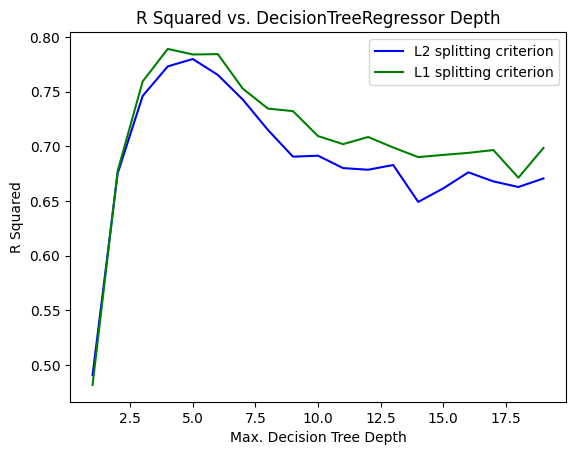

In [17]:
from sklearn.tree import DecisionTreeRegressor

scoresl2 = []
for maxdepth in range(1, 20):
  dt = DecisionTreeRegressor(max_depth = maxdepth).fit(training_features_array, training_labels_array[:, 0])
  scoresl2.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

scoresl1 = []
for maxdepth in range(1, 20):
  print(maxdepth)
  dt = DecisionTreeRegressor(max_depth = maxdepth, criterion = 'absolute_error').fit(training_features_array, training_labels_array[:, 0])
  scoresl1.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

plt.plot(np.arange(1, 20), scoresl2, 'b', label = 'L2 splitting criterion')
plt.plot(np.arange(1, 20), scoresl1, 'g', label = 'L1 splitting criterion')
plt.xlabel('Max. Decision Tree Depth')
plt.ylabel('R^2')
plt.title('R^2 vs. DecisionTreeRegressor Max Depth')
plt.legend()

Random Forest with full feature set, unscaled data, L1/L2 criterion [Bagged Trees]

1
2
3
4
5
1
2
3
4
5


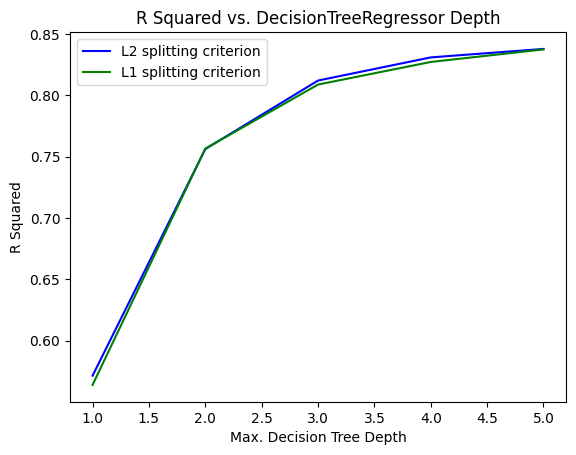

In [22]:
from sklearn.ensemble import RandomForestRegressor

scoresl2 = []
for maxdepth in range(1, 6):
  print(maxdepth)
  dt = RandomForestRegressor(max_depth = maxdepth, max_samples = 0.3).fit(training_features_array, training_labels_array[:, 0])
  scoresl2.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

scoresl1 = []
for maxdepth in range(1, 6):
  print(maxdepth)
  dt = RandomForestRegressor(max_depth = maxdepth, max_samples = 0.3, criterion = 'absolute_error').fit(training_features_array, training_labels_array[:, 0])
  scoresl1.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

plt.plot(np.arange(1, 6), scoresl2, 'b', label = 'L2 splitting criterion')
plt.plot(np.arange(1, 6), scoresl1, 'g', label = 'L1 splitting criterion')
plt.xlabel('Max. Decision Tree Depth')
plt.ylabel('R^2')
plt.title('R^2 vs. RandomForestRegressor Max Depth')
plt.legend()

Random Forest with subset of features, unscaled data, L1/L2 criterion 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

scoresl2 = []
for maxdepth in range(1, 6):
  print(maxdepth)
  dt = RandomForestRegressor(max_depth = maxdepth, max_samples = 0.3, max_features = 0.25).fit(training_features_array, training_labels_array[:, 0])
  scoresl2.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

scoresl1 = []
for maxdepth in range(1, 6):
  print(maxdepth)
  dt = RandomForestRegressor(max_depth = maxdepth, max_samples = 0.3, max_features = 0.25, criterion = 'absolute_error').fit(training_features_array, training_labels_array[:, 0])
  scoresl1.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

plt.plot(np.arange(1, 6), scoresl2, 'b', label = 'L2 splitting criterion')
plt.plot(np.arange(1, 6), scoresl1, 'g', label = 'L1 splitting criterion')
plt.xlabel('Max. Decision Tree Depth')
plt.ylabel('R^2')
plt.title('R^2 vs. RandomForestRegressor Max Depth')
plt.legend()